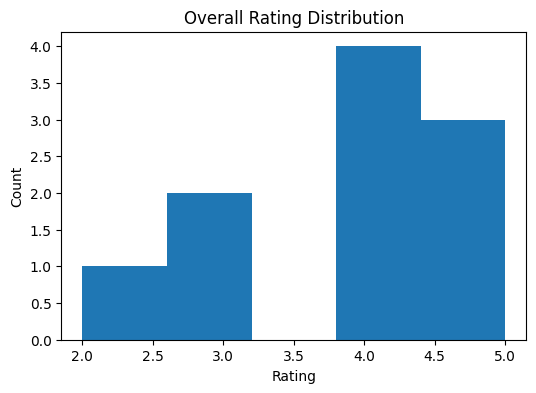

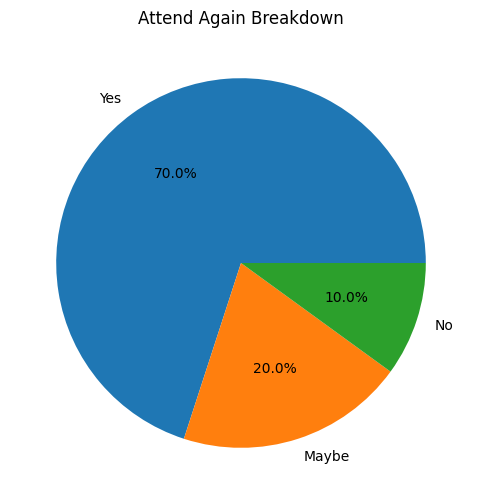

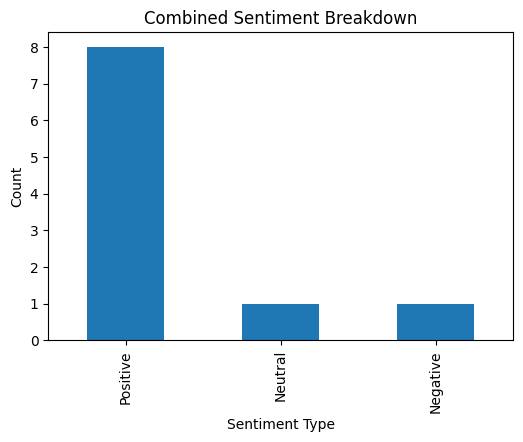

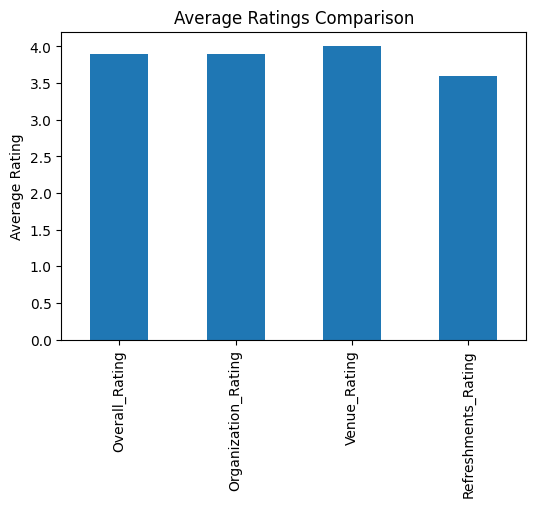

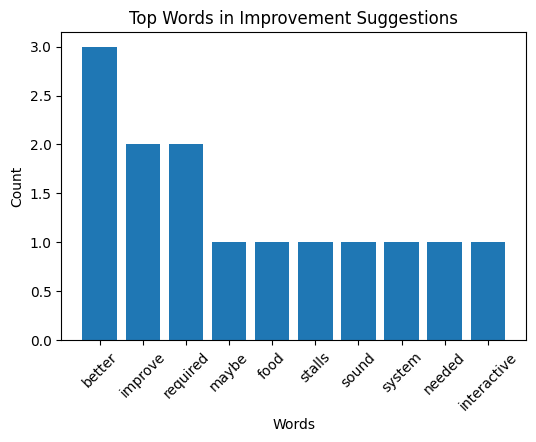

===== SUMMARY =====
Total Responses: 10

Average Ratings:
Overall_Rating         3.9
Organization_Rating    3.9
Venue_Rating           4.0
Refreshments_Rating    3.6
dtype: float64

Sentiment Breakdown:
Combined_Sentiment
Positive    8
Neutral     1
Negative    1
Name: count, dtype: int64

Task 3 Completed Successfully.


In [1]:
# --------------------------------------------
# TASK 3 - College Event Feedback Analysis
# Complete Notebook Code
# --------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter

# ------------------------
# LOAD DATA
# ------------------------
df = pd.read_csv("College_Event_Feedback_Cleaned_Anonymized.csv")

# ------------------------
# SENTIMENT ANALYSIS (Rule-based)
# ------------------------
positive_words = set("""
good great excellent amazing awesome loved love best enjoyable perfect engaging well organized
""".split())

negative_words = set("""
bad poor boring disappointed worst unhappy late crowding problem issue noisy wait
""".split())

def simple_sentiment(text):
    if not isinstance(text, str):
        return 0.0, 'Neutral'
    
    words = re.findall(r"\w+", text.lower())
    if len(words) == 0:
        return 0.0, 'Neutral'
    
    pos = sum(1 for w in words if w in positive_words)
    neg = sum(1 for w in words if w in negative_words)
    
    score = (pos - neg) / len(words)
    
    if score > 0.03:
        label = "Positive"
    elif score < -0.03:
        label = "Negative"
    else:
        label = "Neutral"
    
    return round(score, 3), label

# Apply sentiment on columns
for col in ["Liked", "To_Improve", "Additional_Comments"]:
    df[col+"_Polarity"], df[col+"_Sentiment"] = zip(*df[col].apply(simple_sentiment))

df["Combined_Polarity"] = df[[
    "Liked_Polarity",
    "To_Improve_Polarity",
    "Additional_Comments_Polarity"
]].mean(axis=1)

def combine_label(p):
    if p > 0.03:
        return "Positive"
    elif p < -0.03:
        return "Negative"
    return "Neutral"

df["Combined_Sentiment"] = df["Combined_Polarity"].apply(combine_label)

# ------------------------
# SAVE OUTPUT FILE
# ------------------------
df.to_csv("Task3_Annotated_Output.csv", index=False)

# ------------------------
# VISUALIZATIONS
# ------------------------

# 1. Overall Rating Distribution
plt.figure(figsize=(6,4))
df["Overall_Rating"].plot(kind="hist", bins=5)
plt.title("Overall Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# 2. Attend Again - Pie Chart
plt.figure(figsize=(6,6))
df["Attend_Again"].value_counts().plot(kind="pie", autopct="%1.1f%%", ylabel="")
plt.title("Attend Again Breakdown")
plt.show()

# 3. Sentiment Breakdown
plt.figure(figsize=(6,4))
df["Combined_Sentiment"].value_counts().plot(kind="bar")
plt.title("Combined Sentiment Breakdown")
plt.xlabel("Sentiment Type")
plt.ylabel("Count")
plt.show()

# 4. Average Ratings Comparison
plt.figure(figsize=(6,4))
df[["Overall_Rating", "Organization_Rating", "Venue_Rating", "Refreshments_Rating"]].mean().plot(kind="bar")
plt.title("Average Ratings Comparison")
plt.ylabel("Average Rating")
plt.show()

# 5. Top Improvement Keywords
all_words = []
for t in df["To_Improve"].astype(str):
    all_words += re.findall(r"\w+", t.lower())

stopwords = ['the','and','to','be','can','more','is','of','in','with','a','an','was','were','could','would']
filtered_words = [w for w in all_words if w not in stopwords]

word_counts = Counter(filtered_words).most_common(10)
words, counts = zip(*word_counts)

plt.figure(figsize=(6,4))
plt.bar(words, counts)
plt.title("Top Words in Improvement Suggestions")
plt.xlabel("Words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# ------------------------
# SUMMARY OUTPUT
# ------------------------
print("===== SUMMARY =====")
print("Total Responses:", len(df))
print("\nAverage Ratings:")
print(df[["Overall_Rating","Organization_Rating",
         "Venue_Rating","Refreshments_Rating"]].mean())
print("\nSentiment Breakdown:")
print(df["Combined_Sentiment"].value_counts())
print("\nTask 3 Completed Successfully.")
